# Introduction to Regression

---

## Getting Started
Let's start with the basics and some artificial data!

### Initializations

Initialize/Import some basic packages

*Make sure to comment your code so you can remember what it does in 2+ days :P*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math


# pipeing:
from sklearn.pipeline import make_pipeline

# Let's ignore warnings (they're annoying and we know what's up)
import warnings
warnings.filterwarnings("ignore")

ML Models

In [2]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

---

Let's generate some fake data

---

Let's fix some parameters

*Fixing things ahead of time will make it easy to modify our code on the fly!*

In [3]:
# Number of training points
N_train = 10
N_test = 2
# Dimension of Input Space
d = 2

#### Inputs

In [4]:
# Training Set

## A Random set of N inputs in 2 dimensions
X_train = np.random.normal(0,1,np.array([N_train,d]))
## 1) We'll convert to pandas object type since it's easier to work with than numpy (in these cases)
## 2) We'll name our columns
X_train = pd.DataFrame(X_train,columns=['x1','x2'])
## View our Dataframe (to make sure there arent' any coding erros)
print(X_train)

# Testing Set
X_test = np.random.normal(0,1,np.array([N_test,d]))
## 1) We'll convert to pandas object type since it's easier to work with than numpy (in these cases)
## 2) We'll name our columns
X_test = pd.DataFrame(X_test,columns=['x1','x2'])
## View our Dataframe (to make sure there arent' any coding erros)
X_test

         x1        x2
0  2.068304  0.709617
1 -1.409210  1.332683
2 -1.437824 -0.811413
3  0.952910  0.715756
4  1.631514  0.813973
5  0.719636  1.971965
6  0.141245 -0.086647
7 -0.048018 -1.574025
8 -0.518596 -0.156406
9  1.438332  0.807952


,x1,x2
0,-1.852712,-0.183437
1,0.441131,-0.372810


#### Outputs
We'll consider the simple (noisless) linear target model
$$
y_n = 2\,x_1 + 2\,x_2
$$

In [5]:
# Train

## Initialize our target dataframe
Y_train = X_train.copy()
## We first multiply the first row of our Pandas Dataframe by 2 (note the above equation)
Y_train['x1'] = Y_train['x1'].apply(lambda x: 2*x)
## We'll sum across the rows of our dataframe
Y_train = pd.DataFrame(Y_train.sum(axis = 1),columns=['Y'])
## Visualize to check there are no coding errors!
print(Y_train)

# Test
## Initialize our target dataframe
Y_test = X_test.copy()
## We first multiply the first row of our Pandas Dataframe by 2 (note the above equation)
Y_test['x1'] = Y_test['x1'].apply(lambda x: 2*x)
## We'll sum across the rows of our dataframe
Y_test = pd.DataFrame(Y_test.sum(axis = 1),columns=['Y'])
Y_test

          Y
0  4.846224
1 -1.485737
2 -3.687061
3  2.621576
4  4.077001
5  3.411236
6  0.195842
7 -1.670062
8 -1.193598
9  3.684615


,Y
0,-3.888861
1,0.509452


#### Building and Training our Regression Model

In [6]:
model = LinearRegression()

First we train our model, with the "training" (a.k.a. in-sample) data.

In [7]:
model.fit(X_train, Y_train)

LinearRegression()

Now we'll predict the test data given our input train data!

In [8]:
# Generate Prediction
Yhat_test = model.predict(X_test)
# Convert to "vector shape"
Yhat_test = Yhat_test.reshape([-1,])
# Visualize to make sure things look okay!
Yhat_test

array([-3.88886054,  0.50945247])

We'll record our training performance while we're at it also.

In [9]:
# Generate Prediction
Yhat_train = model.predict(X_train)
# Convert to "vector shape"
Yhat_train = Yhat_train.reshape([-1,])
# Visualize to make sure things look okay!
Yhat_train

array([ 4.84622387, -1.48573694, -3.68706143,  2.62157567,  4.07700146,
        3.41123629,  0.19584174, -1.67006188, -1.19359774,  3.68461545])

---

### Let's do it with real data.

Let's pull data from Yahoo finance.

In [10]:
# This package pulls, data from finance
import yfinance as yf

We will pull, google stock's daily closing prices from Yahoo finance as covariates.
The targets will be Google's next day price using apple's closing price from the day before:)

We'll train on a daily 3 year period!

In [11]:
# Pull
Y_data_raw = yf.download('GOOG','2018-01-03','2020-12-30')
# check
print('Tail')
print(Y_data_raw.tail())
print('Head')
print(Y_data_raw.head())

# Pull Covariates
X_data_raw = yf.download('AAPL','2018-01-02','2020-12-29')
# check
print('Tail')
print(X_data_raw.tail())
print('Head')
print(X_data_raw.head())

[*********************100%***********************]  1 of 1 completed
Tail
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-12-22  86.721497  86.870247  85.628754  86.175003  86.175003  18734000
2020-12-23  86.405502  87.399498  86.251999  86.619003  86.619003  20676000
2020-12-24  86.750000  87.300003  86.455498  86.942497  86.942497   6936000
2020-12-28  87.581749  89.536400  87.316750  88.804497  88.804497  27860000
2020-12-29  89.389503  89.622002  87.804497  87.935997  87.935997  25988000
Head
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-03  53.215500  54.314499  53.160500  54.124001  54.124001  28604000
2018-01-04  54.400002  54.678501  54.200100  54.320000  54.320000  20092000
2018-01-05  54.700001  55.212502  54.599998  55.111500  55.111500  25582000
2018-01-0

In [12]:
# 1) Keep only the Closing Prices as covariates
# 2) Convert to Dataframe type (Manipulation of data is easier for this object class; as opposed to numpy arrays)
Y = pd.DataFrame(Y_data_raw.Close)
X = pd.DataFrame(X_data_raw.Close)

# Just double-check arrays are of the same size (note Jan. 1rst is a holiday)
print(X.shape)
print(Y.shape)

(753, 1)
(753, 1)


Let's visualize things

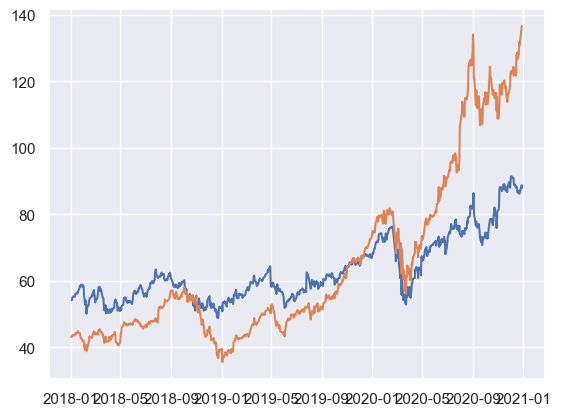

In [13]:
# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(Y)
plt.plot(X)

Let's make the last 20 days "invisible" and use them as our testing set (we'll pretend those are the too be predicted prices!).

In [14]:
# Number of training points
N_test = 10**2

# Build Train
Y_train = Y[:-N_test]
X_train = X[:-N_test]

# Build Test
Y_test = Y[:N_test]
X_test = X[:N_test]


# Visualize Dataframe Dimensions (make sure things are running reasonably!)
print('Check Train')
print(X_train.shape)
print(X_train.head())
print('Check Test')
print(X_test.shape)
X_test.head()

Check Train
(653, 1)
                Close
Date                 
2018-01-02  43.064999
2018-01-03  43.057499
2018-01-04  43.257500
2018-01-05  43.750000
2018-01-08  43.587502
Check Test
(100, 1)


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


#### Building and Training our Regression Model

In [15]:
model = LinearRegression()

First we train our model, with the "training" (a.k.a. in-sample) data.

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

Now we'll predict the test data given our input train data!

In [17]:
# Generate Prediction
Yhat_test = model.predict(X_test)
# Convert to "vector shape"
Yhat_test = Yhat_test.reshape([-1,])
# Visualize to make sure things look okay!
Yhat_test

array([54.71761996, 54.7145467 , 54.79650399, 54.99832318, 54.93173376,
       54.92968439, 54.92558567, 55.027008  , 55.21243541, 55.12023444,
       55.41835333, 55.43474353, 55.35278781, 55.20321563, 55.20731279,
       54.91841525, 54.59980742, 54.64078529, 54.27710244, 54.17568011,
       54.2228045 , 54.25866131, 53.51285291, 53.10204411, 53.77204173,
       53.41450385, 52.96476498, 53.09384822, 53.73925976, 53.90624604,
       54.21665798, 54.79240683, 54.73503563, 54.67561819, 54.59571026,
       54.74220761, 55.04954629, 55.40503482, 55.34561582, 55.3179549 ,
       54.99832318, 55.1222838 , 55.18477606, 55.16940819, 55.00139644,
       55.1970691 , 55.50850494, 55.68676194, 55.50748104, 55.35073844,
       55.37225127, 55.30771122, 55.02905736, 55.02291083, 54.61619919,
       54.36827952, 53.9677144 , 54.76986853, 54.31603094, 54.1254809 ,
       54.25866131, 54.14596983, 54.32115357, 54.65103054, 54.77294179,
       54.32012967, 54.49121467, 54.81904228, 54.73606109, 54.91

We'll record our training performance while we're at it also.

In [18]:
# Generate Prediction
Yhat_train = model.predict(X_train)
# Convert to "vector shape"
Yhat_train = Yhat_train.reshape([-1,])
# Visualize to make sure things look okay!
Yhat_train

array([54.71761996, 54.7145467 , 54.79650399, 54.99832318, 54.93173376,
       54.92968439, 54.92558567, 55.027008  , 55.21243541, 55.12023444,
       55.41835333, 55.43474353, 55.35278781, 55.20321563, 55.20731279,
       54.91841525, 54.59980742, 54.64078529, 54.27710244, 54.17568011,
       54.2228045 , 54.25866131, 53.51285291, 53.10204411, 53.77204173,
       53.41450385, 52.96476498, 53.09384822, 53.73925976, 53.90624604,
       54.21665798, 54.79240683, 54.73503563, 54.67561819, 54.59571026,
       54.74220761, 55.04954629, 55.40503482, 55.34561582, 55.3179549 ,
       54.99832318, 55.1222838 , 55.18477606, 55.16940819, 55.00139644,
       55.1970691 , 55.50850494, 55.68676194, 55.50748104, 55.35073844,
       55.37225127, 55.30771122, 55.02905736, 55.02291083, 54.61619919,
       54.36827952, 53.9677144 , 54.76986853, 54.31603094, 54.1254809 ,
       54.25866131, 54.14596983, 54.32115357, 54.65103054, 54.77294179,
       54.32012967, 54.49121467, 54.81904228, 54.73606109, 54.91

### Let's check how we did!

Build dataframe

*This is not the most efficient coding; but the point is rather to show you how to name and join columns to dataframes :)*

In [19]:
# Let's build a dataframe with the target and our predictions as columns
time_series_comparison = pd.DataFrame(Y_test)
time_series_comparison.columns = ['Targets_Test'] # <- Rename columns

# Append Predictions to Dataframe
time_series_comparison['Predictions_Test'] = Yhat_test

# Check nothing went wrong (Safefy First!)
time_series_comparison

,Targets_Test,Predictions_Test
Date,,
2018-01-03,54.124001,54.717620
2018-01-04,54.320000,54.714547
2018-01-05,55.111500,54.796504
2018-01-08,55.347000,54.998323
2018-01-09,55.313000,54.931734
...,...,...
2018-05-21,53.979000,56.156990
2018-05-22,53.486500,56.292220
2018-05-23,53.984501,56.244070


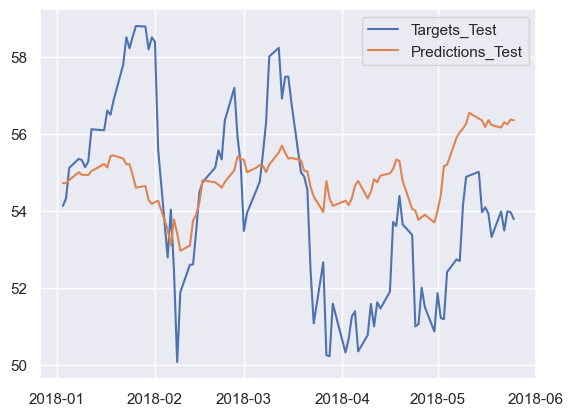

In [20]:
# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(time_series_comparison)

# Now we'll need a legend also
plt.legend(time_series_comparison.columns);

# Kernel Regressor
We will use the Gaussian (or [radial basis function](https://en.wikipedia.org/wiki/Radial_basis_function)) kernel
$$
\kappa(x,\tilde{x}) := e^{\frac{-\|x-\tilde{x}\|^2}{2 \sigma^2}}.
$$

Load Model

In [21]:
from sklearn.gaussian_process.kernels import RBF
kernel = RBF(1.0)
krr_model = KernelRidge(alpha=0.00001,
                       kernel=kernel)

Train Model

In [22]:
krr_model.fit(X_train, Y_train)

KernelRidge(alpha=1e-05, kernel=RBF(length_scale=1))

#### Get Predictions
Test

In [23]:
# Generate Prediction
krr_Yhat_test = krr_model.predict(X_test)
# Convert to "vector shape"
krr_Yhat_test = krr_Yhat_test.reshape([-1,])
# Visualize to make sure things look okay!
krr_Yhat_test

array([54.78522997, 54.7981347 , 54.46035588, 54.97021742, 54.60898362,
       54.59905592, 54.57966076, 55.11248058, 55.16855133, 55.31104462,
       56.16210845, 56.34799279, 55.51708192, 55.18455484, 55.17722126,
       54.54733721, 54.89606519, 54.97310845, 53.3530507 , 53.86360435,
       53.64700245, 53.44716271, 51.50929191, 52.64696658, 51.50325225,
       51.09033664, 53.52953449, 52.71068153, 51.56714156, 52.00955723,
       53.68032329, 54.47320887, 54.70884334, 54.9308068 , 54.88026648,
       54.67660115, 55.20218707, 56.01489549, 55.4627413 , 55.29182832,
       54.97021742, 55.31028543, 55.22018019, 55.25014241, 54.98656526,
       55.19607287, 57.1149059 , 56.92281934, 57.10631942, 55.50115213,
       55.68346996, 55.24467327, 55.12156424, 55.09382297, 54.94451188,
       53.21534934, 52.6680449 , 54.55633883, 53.21236805, 53.92323988,
       53.44716271, 53.92649113, 53.20188141, 54.97007533, 54.54394858,
       53.20380542, 54.08915195, 54.40540306, 54.70424171, 54.51

Append to Dataframe of Results

In [24]:
# Append Predictions to Dataframe
time_series_comparison['Krr_Predictions_Test'] = krr_Yhat_test
time_series_comparison

,Targets_Test,Predictions_Test,Krr_Predictions_Test
Date,,,
2018-01-03,54.124001,54.717620,54.785230
2018-01-04,54.320000,54.714547,54.798135
2018-01-05,55.111500,54.796504,54.460356
2018-01-08,55.347000,54.998323,54.970217
2018-01-09,55.313000,54.931734,54.608984
...,...,...,...
2018-05-21,53.979000,56.156990,55.726882
2018-05-22,53.486500,56.292220,55.838717
2018-05-23,53.984501,56.244070,55.681464


Visualiztion

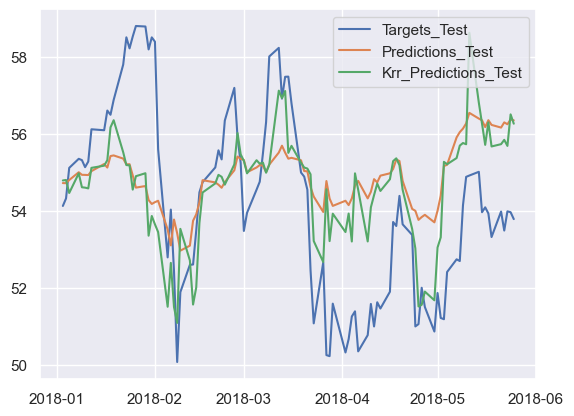

In [25]:
# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(time_series_comparison)

# Now we'll need a legend also
plt.legend(time_series_comparison.columns);

---

## Sin Feature Map

What about sinusoidal features?
$$
x\mapsto (\sin(i\,x))_{i=0}^p
$$

Let's write up our feature map (default 10 frequencies).

Let's set the dimension of our feature space!

In [26]:
# Max osculations size
frequencies_max=100
# Create polynomial features
degree = 10**4  # Change this to the degree of the polynomial you want

Let's build the feature map !

In [27]:
def sine_feature_map(X, frequency_max = frequencies_max, feature_space_dim = degree):
    # Generate Frequencies
    frequencies = np.linspace(-frequency_max,frequency_max,degree)
    """
    Apply a sine feature map to the input data.

    Parameters:
    - X: ndarray, input data of shape (n_samples, n_features).
    - frequencies: list of floats, the frequencies to use for the sine transformation.

    Returns:
    - mapped_X: ndarray, transformed data with sine features of shape (n_samples, n_features * len(frequencies)).
    """
    mapped_X = np.concatenate([np.sin(f * X) for f in frequencies], axis=1)
    
    # We add back in the identity
    mapped_X = np.concatenate([X,mapped_X],axis=1)
    
    # Let's add ones
    mapped_X = np.concatenate([np.ones(np.shape(X)),mapped_X],axis=1)
    
    return mapped_X

Let's trasform our data.

In [28]:
# Training Set
X_sin__train = sine_feature_map(X_train)

# Test Set
X_sin__test = sine_feature_map(X_test)

Let's evaluate our previous pipeline with the sinusoidal feature map and see how we compare!

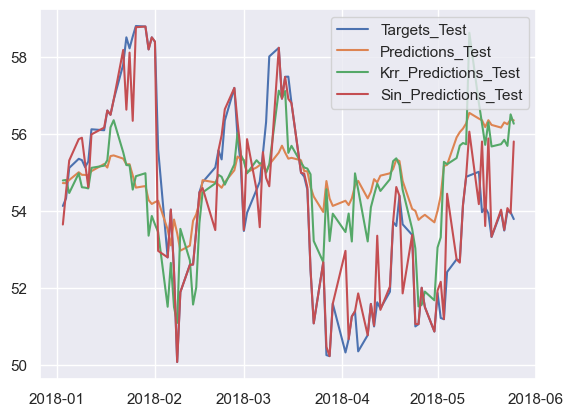

In [29]:
# Fit a Ridge regression model to the sinusoidal features
alpha = 10**-2  # Regularization strength; you can adjust this value
sin_ridge_model = Ridge(alpha=alpha)
sin_ridge_model.fit(X_sin__train, Y_train)

# Generate Prediction
sin__Yhat_train = sin_ridge_model.predict(X_sin__train)
# Convert to "vector shape"
sin__Yhat_train = sin__Yhat_train.reshape([-1,])
# Visualize to make sure things look okay!
sin__Yhat_train

# Generate Prediction
sin__Yhat_test = sin_ridge_model.predict(X_sin__test)
# Convert to "vector shape"
sin__Yhat_test = sin__Yhat_test.reshape([-1,])
# Visualize to make sure things look okay!
np.shape(sin__Yhat_test)

# Append Predictions to Dataframe
time_series_comparison['Sin_Predictions_Test'] = sin__Yhat_test

# Check nothing went wrong (Safefy First!)
time_series_comparison

# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(time_series_comparison)

# Now we'll need a legend also
plt.legend(time_series_comparison.columns);

Let's Evaluate

In [30]:
print('Vanilla MAE - Test')
np.mean(np.abs(Yhat_test-Y_test['Targets_Test']))

Vanilla MAE - Test


1.9926571939370847

In [31]:
print('Sine MAE - Test')
np.mean(np.abs(sin__Yhat_test-Y_test['Targets_Test']))

Sine MAE - Test


0.4294234555961949

---

# A first look at depth

One can ofcourse stack several feature maps, and consequentially several kernels.  Indeed, the usual theory [stacks as well](https://jmlr.org/papers/v20/17-621.html).

Since our sinusoidal features work so well (even for a finite-dimensional *explicit* feature space), and the Gaussian kernel is so much better than the linear kernel (infinite-dimensional *implicit* feature space).  So why not combine them?

- Let's **first** use the sine feature transform,
- Then apply the kernel ridge regressor on the transformed features!

In [32]:
from sklearn.gaussian_process.kernels import RBF
kernel_sin = RBF(1.0)
kernel_sin = KernelRidge(alpha=0.00001,
                       kernel=kernel)


kernel_sin.fit(X_sin__train, Y_train)


# Generate Prediction
krr_sin_Yhat_test = kernel_sin.predict(X_sin__test)
# Convert to "vector shape"
krr_sin_Yhat_test = krr_sin_Yhat_test.reshape([-1,])

In [33]:
# Append Predictions to Dataframe
time_series_comparison['Krr_wSin_Features__Predictions_Test'] = krr_sin_Yhat_test
time_series_comparison

,Targets_Test,Predictions_Test,Krr_Predictions_Test,Sin_Predictions_Test,Krr_wSin_Features__Predictions_Test
Date,,,,,
2018-01-03,54.124001,54.717620,54.785230,53.642534,54.123459
2018-01-04,54.320000,54.714547,54.798135,54.489286,54.319457
2018-01-05,55.111500,54.796504,54.460356,55.303131,55.110949
2018-01-08,55.347000,54.998323,54.970217,55.857231,54.646226
2018-01-09,55.313000,54.931734,54.608984,55.893909,55.312447
...,...,...,...,...,...
2018-05-21,53.979000,56.156990,55.726882,54.026454,53.978460
2018-05-22,53.486500,56.292220,55.838717,53.503545,53.485965
2018-05-23,53.984501,56.244070,55.681464,54.067443,53.983961


## Rankings

#### Qualitative

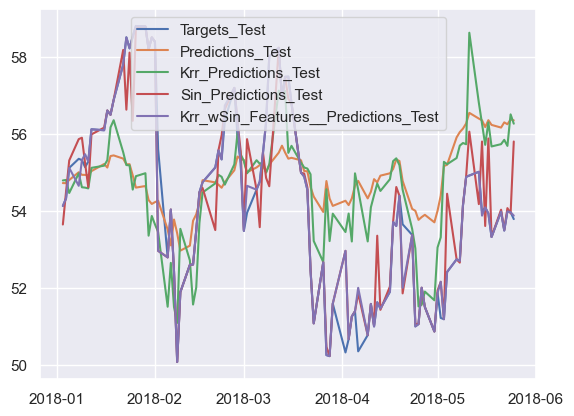

In [34]:
# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(time_series_comparison)

# Now we'll need a legend also
plt.legend(time_series_comparison.columns);

#### Quantitative

In [35]:
# Compute MAEs
Van_MAE = np.mean(np.abs(Yhat_test-Y_test['Targets_Test']))
kernel_MAE = np.mean(np.abs(krr_Yhat_test-Y_test['Targets_Test']))
Sin_MAE = np.mean(np.abs(sin__Yhat_test-Y_test['Targets_Test']))
kernel_Sin_MAE = np.mean(np.abs(krr_sin_Yhat_test-Y_test['Targets_Test']))


# Report
print('Vanilla MAE - Test:  '+str(Van_MAE))
print('Sine MAE - Test:  '+str(Sin_MAE))
print('')
print('KRR MAE - Test:  '+str(kernel_MAE))
print('KRR + Sine MAE - Test:  '+str(kernel_Sin_MAE))

Vanilla MAE - Test:  1.9926571939370847
Sine MAE - Test:  0.4294234555961949

KRR MAE - Test:  1.7448482675154082
KRR + Sine MAE - Test:  0.12252355814189655


### Visualization

Done!


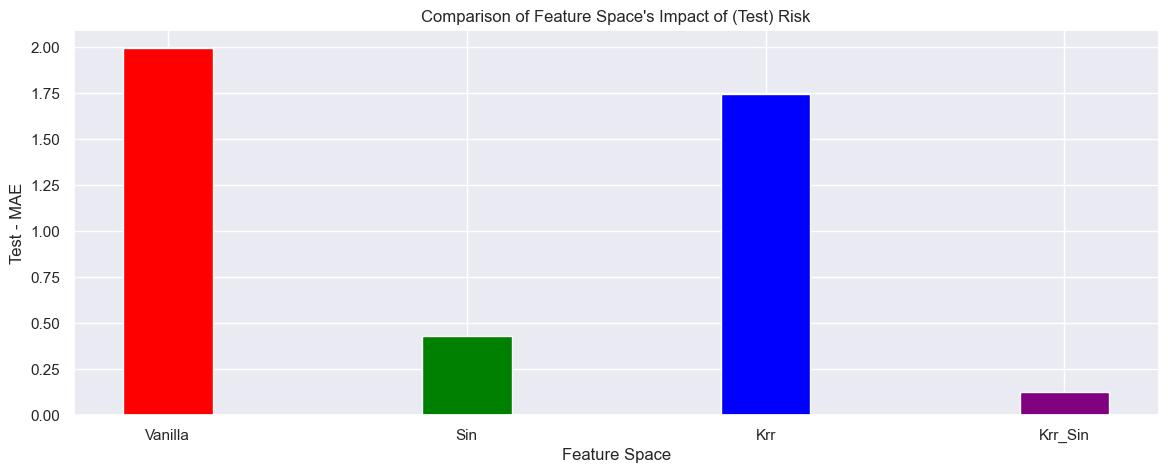

In [36]:
# creating the dataset
data = pd.DataFrame({'Method':[Van_MAE,Sin_MAE,kernel_MAE,kernel_Sin_MAE]}, 
                    index=['Vanilla','Sin','Krr','Krr_Sin'])


fig, ax = plt.subplots(figsize=(14, 5))
bars = ax.bar(data.index, data['Method'], color=["red", "green","blue","purple"], width = 0.3)

 
plt.xlabel("Feature Space")
plt.ylabel("Test - MAE")
plt.title("Comparison of Feature Space's Impact of (Test) Risk")

print('Done!')
plt.show()

## Let's Destroy It

### Build Feature Map (pop-off final layer)

Load Pytorch

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

Coersion

In [38]:
X_train_torch = torch.tensor(np.array(X_train)).to(torch.float32)
X_test_torch = torch.tensor(np.array(X_test)).to(torch.float32)

Y_train_torch = torch.tensor(np.array(Y_train).flatten()).to(torch.float32)
Y_test_torch = torch.tensor(np.array(Y_test).flatten()).to(torch.float32)

#### Define the MLP Model and Train it

In [ ]:
# Define the hyperparameters
input_size = X_train_torch.shape[1]  # Input features
hidden_size = 10**3  # Size of the hidden layer
deep_feature = 10**4
output_size = 1  # Output classes
learning_rate = 2*(10**0)
num_epochs = 10**3

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.activ = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.activ = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size,deep_feature)
        self.activ = nn.Sigmoid()
        self.fc4 = nn.Linear(deep_feature,output_size)

    def forward(self, x):
        # Deep Fourier
        x = self.fc1(x)
        x = self.activ(x)
        x = self.fc2(x)
        x = self.activ(x)
        x = torch.sin(x)
        x = self.fc2(x)
        x = self.activ(x)
        x = torch.sin(x)
        x = self.fc3(x)
        x = self.activ(x)
        x = torch.sin(x)
        x = self.fc4(x)
        return x


# Create an instance of the model
model = MLP(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Dummy data (you should replace this with your dataset)
input_data = X_train_torch
targets = Y_train_torch

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(input_data)
    loss = criterion(outputs, targets)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


print('Training finished.')

Epoch [100/1000], Loss: 1887.47216796875
Epoch [200/1000], Loss: 46.05133056640625
Epoch [300/1000], Loss: 45.98614501953125
Epoch [400/1000], Loss: 45.986141204833984
Epoch [500/1000], Loss: 45.98614501953125
Epoch [600/1000], Loss: 45.98614501953125
Epoch [700/1000], Loss: 45.98614501953125
Epoch [800/1000], Loss: 45.986141204833984


### Remove Periultimate Layer

In [ ]:
feature_map_torch = torch.nn.Sequential(*(list(model.children())[:-1]))
def feature_map(X_in):
    X_in = torch.tensor(np.array(X_in)).to(torch.float32)
    features = feature_map_torch(X_in).detach().cpu().numpy()
    
    # We add back in the identity
    features = np.concatenate([X_in,features],axis=1)
    
    # Let's add ones
    features = np.concatenate([np.ones(np.shape(X_in)),features],axis=1)
    
    return features

In [ ]:
# Training Set
X_features__train = feature_map(X_train)

# # Test Set
X_features__test = feature_map(X_test)

from sklearn.gaussian_process.kernels import RBF
kernel_sin = RBF(1.0)
MLP_ridge_model = KernelRidge(alpha=0.00001,
                       kernel=kernel)

MLP_ridge_model.fit(X_features__train, Y_train)

# Generate Prediction
MLP__Yhat_train = MLP_ridge_model.predict(X_features__train)
# Convert to "vector shape"
MLP__Yhat_train = MLP__Yhat_train.reshape([-1,])
# Visualize to make sure things look okay!
MLP__Yhat_train

# Generate Prediction
MLP__Yhat_test = MLP_ridge_model.predict(X_features__test)
# Convert to "vector shape"
MLP__Yhat_test = MLP__Yhat_test.reshape([-1,])
# Visualize to make sure things look okay!
np.shape(MLP__Yhat_test)

# Append Predictions to Dataframe
time_series_comparison['MLP_Predictions_Test'] = MLP__Yhat_test

# Check nothing went wrong (Safefy First!)
time_series_comparison

# Activate Seaborn (<- this makes plots pretty :3)
sns.set()

# Plot!
plt.plot(time_series_comparison)

# Now we'll need a legend also
plt.legend(time_series_comparison.columns);

### Results

#### Quantitative

In [ ]:
# Compute MAEs
Van_MAE = np.mean(np.abs(Yhat_test-Y_test['Targets_Test']))
kernel_MAE = np.mean(np.abs(krr_Yhat_test-Y_test['Targets_Test']))
Sin_MAE = np.mean(np.abs(sin__Yhat_test-Y_test['Targets_Test']))
kernel_Sin_MAE = np.mean(np.abs(krr_sin_Yhat_test-Y_test['Targets_Test']))
MLP_MAE = np.mean(np.abs(MLP__Yhat_test-Y_test['Targets_Test']))


# Report
print('Vanilla MAE - Test:  '+str(Van_MAE))
print('Sine MAE - Test:  '+str(Sin_MAE))
print('')
print('KRR MAE - Test:  '+str(kernel_MAE))
print('KRR + Sine MAE - Test:  '+str(kernel_Sin_MAE))
print('')
print('')
print('MLP MAE - Test:  '+str(MLP_MAE))

### Visualization

In [ ]:
# creating the dataset
data = pd.DataFrame({'Method':[Van_MAE,Sin_MAE,kernel_MAE,kernel_Sin_MAE,MLP_MAE]}, 
                    index=['Vanilla','Sin','Krr','Krr_Sin','MLP'])


fig, ax = plt.subplots(figsize=(14, 5))
bars = ax.bar(data.index, data['Method'], color=["red", "green","blue","purple","orange"], width = 0.3)

 
plt.xlabel("Feature Space")
plt.ylabel("Test - MAE")
plt.title("Comparison of Feature Space's Impact of (Test) Risk")

print('Done!')
plt.show()

---

# Fin

---